## Example to load reference data

ERA5-Land is used as reference dataset. This notebook shows how to read a subset of ERA5-Land for temperature and relative humidity.

In [1]:
## Expand JVM memory
options(java.parameters = "-Xmx8000m")

## Climate4R
library(loadeR)
library(visualizeR)
library(convertR)
library(HeatStress)

Loading required package: rJava



Loading required package: loadeR.java

Java version 23x amd64 by N/A detected

The maximum JVM heap space available is: 7.81 GB

NetCDF Java Library Version: 4.6.0-SNAPSHOT (Built-On: 20150423.1338) loaded and ready

You can manually set the NetCDF Java Library version before loading the package:
options(loadeR.java_forced_version = "X.Y.Z")
library(loadeR.java)

netCDF-Java CLASSPATH from bundled java package directory: /mnt/CORDEX_CMIP6_tmp/user_tmp/acasanueva/micromamba/envs/R4.3/lib/R/library/loadeR.java/java:/mnt/CORDEX_CMIP6_tmp/user_tmp/acasanueva/micromamba/envs/R4.3/lib/R/library/loadeR.java/java/netcdfAll-4.6.0-SNAPSHOT.jar

Loading required package: climate4R.UDG

climate4R.UDG version 0.2.6 (2023-06-26) is loaded

Please use 'citation("climate4R.UDG")' to cite this package.

loadeR version 1.8.4 (2025-08-07) is loaded

Please use 'citation("loadeR")' to cite this package.

Loading required package: transformeR




    _______   ____  ___________________  __  ________ 
   / ___/ /  / /  |/  / __  /_  __/ __/ / / / / __  / 
  / /  / /  / / /|_/ / /_/ / / / / __/ / /_/ / /_/_/  
 / /__/ /__/ / /  / / __  / / / / /__ /___  / / \ \ 
 \___/____/_/_/  /_/_/ /_/ /_/  \___/    /_/\/   \_\ 
 
      github.com/SantanderMetGroup/climate4R



transformeR version 2.2.2 (2023-10-26) is loaded


Get the latest stable version (2.2.3) using <devtools::install_github('SantanderMetGroup/transformeR')>

Please see 'citation("transformeR")' to cite this package.

visualizeR version 1.6.4 (2023-10-26) is loaded

Please see 'citation("visualizeR")' to cite this package.

Loading required package: udunits2

udunits system database read from /mnt/CORDEX_CMIP6_tmp/user_tmp/acasanueva/micromamba/envs/R4.3/lib/R/library/udunits2/share/udunits2.xml

convertR version 0.2.1 (2023-06-22) is loaded

  More information about the 'climate4R' ecosystem in: http://meteo.unican.es/climate4R


Attaching package: ‘convertR’


The following objects are masked from ‘package:loadeR’:

    hurs2huss, huss2hurs, tdps2hurs


Loading required package: magrittr

HeatStress version 1.0.8.1 (2019-07-01) is loaded

Use 'indexShow()' for an overview of the available heat indices



In [2]:
ncml_folder <- "/mnt/CORDEX_CMIP6_tmp/user_tmp/jbediajimenez/data_catalogs/"
ncml_file_tas <- paste0(ncml_folder, "t2m_era5-land.ncml")
ncml_file_hurs <- paste0(ncml_folder, "hurs_era5-land.ncml")

In [3]:
di <- dataInventory(ncml_file_tas)

[2026-01-18 19:18:55.502134] Doing inventory ...



[2026-01-18 19:18:56.547697] Retrieving info for 't2m' (0 vars remaining)

[2026-01-18 19:18:56.628295] Done.



In [4]:
str(di)

List of 1
 $ t2m:List of 7
  ..$ Description: chr "2 metre temperature"
  ..$ DataType   : chr "float"
  ..$ Shape      : int [1:3] 657455 451 681
  ..$ Units      : chr "K"
  ..$ DataSizeMb : num 807699
  ..$ Version    : logi NA
  ..$ Dimensions :List of 3
  .. ..$ time     :List of 4
  .. .. ..$ Type      : chr "Time"
  .. .. ..$ TimeStep  : chr "3600.0 seconds"
  .. .. ..$ Units     : chr "seconds since 1970-01-01"
  .. .. ..$ Date_range: chr "1950-01-01T01:00:00Z - 2024-12-31T23:00:00Z"
  .. ..$ latitude :List of 5
  .. .. ..$ Type       : chr "Lat"
  .. .. ..$ Units      : chr "degrees_north"
  .. .. ..$ Values     : num [1:451] 75 74.9 74.8 74.7 74.6 74.5 74.4 74.3 74.2 74.1 ...
  .. .. ..$ Shape      : int 451
  .. .. ..$ Coordinates: chr "latitude"
  .. ..$ longitude:List of 5
  .. .. ..$ Type       : chr "Lon"
  .. .. ..$ Units      : chr "degrees_east"
  .. .. ..$ Values     : num [1:681] -26 -25.9 -25.8 -25.7 -25.6 -25.5 -25.4 -25.3 -25.2 -25.1 ...
  .. .. ..$ Shape      : 

In [5]:
di <- dataInventory(ncml_file_hurs)

[2026-01-18 19:18:56.72017] Doing inventory ...



[2026-01-18 19:18:57.185487] Retrieving info for 'hurs' (0 vars remaining)

[2026-01-18 19:18:57.235046] Done.



In [6]:
str(di)

List of 1
 $ hurs:List of 7
  ..$ Description: chr "near-surface relative humidity"
  ..$ DataType   : chr "float"
  ..$ Shape      : int [1:3] 657455 451 681
  ..$ Units      : chr "%"
  ..$ DataSizeMb : num 807699
  ..$ Version    : logi NA
  ..$ Dimensions :List of 3
  .. ..$ time:List of 4
  .. .. ..$ Type      : chr "Time"
  .. .. ..$ TimeStep  : chr ".041666 days"
  .. .. ..$ Units     : chr "days since 1950-01-01 01:00:00 GMT"
  .. .. ..$ Date_range: chr "1950-01-01T01:00:00Z - 2024-12-31T23:00:00Z"
  .. ..$ lat :List of 5
  .. .. ..$ Type       : chr "Lat"
  .. .. ..$ Units      : chr "degrees_north"
  .. .. ..$ Values     : num [1:451] 30 30.1 30.2 30.3 30.4 ...
  .. .. ..$ Shape      : int 451
  .. .. ..$ Coordinates: chr "lat"
  .. ..$ lon :List of 5
  .. .. ..$ Type       : chr "Lon"
  .. .. ..$ Units      : chr "degrees_east"
  .. .. ..$ Values     : num [1:681] -26 -25.9 -25.8 -25.7 -25.6 -25.5 -25.4 -25.3 -25.2 -25.1 ...
  .. .. ..$ Shape      : int 681
  .. .. ..$ Coord

In [7]:
data_tas <- loadGridData(ncml_file_tas, var = "t2m", years = 2000, season= 7)
data_tas <- udConvertGrid(data_tas, new.units = "degC")

[2026-01-18 19:18:57.611414] Defining geo-location parameters

[2026-01-18 19:18:57.654677] Defining time selection parameters

[2026-01-18 19:19:01.222672] Retrieving data subset ...

[2026-01-18 19:19:23.855606] Done



In [8]:
str(data_tas)

List of 4
 $ Variable:List of 2
  ..$ varName: chr "t2m"
  ..$ level  : NULL
  ..- attr(*, "use_dictionary")= logi FALSE
  ..- attr(*, "description")= chr "2 metre temperature"
  ..- attr(*, "units")= chr "degC"
  ..- attr(*, "longname")= chr "t2m"
  ..- attr(*, "daily_agg_cellfun")= chr "none"
  ..- attr(*, "monthly_agg_cellfun")= chr "none"
  ..- attr(*, "verification_time")= chr "none"
 $ Data    : num [1:744, 1:451, 1:681] NA NA NA NA NA NA NA NA NA NA ...
  ..- attr(*, "dimensions")= chr [1:3] "time" "lat" "lon"
 $ xyCoords:List of 2
  ..$ x: num [1:681] -26 -25.9 -25.8 -25.7 -25.6 -25.5 -25.4 -25.3 -25.2 -25.1 ...
  ..$ y: num [1:451] 30 30.1 30.2 30.3 30.4 ...
  ..- attr(*, "projection")= chr "LatLonProjection"
  ..- attr(*, "resX")= num 0.1
  ..- attr(*, "resY")= num 0.1
 $ Dates   :List of 2
  ..$ start: chr [1:744] "2000-07-01 00:00:00 GMT" "2000-07-01 01:00:00 GMT" "2000-07-01 02:00:00 GMT" "2000-07-01 03:00:00 GMT" ...
  ..$ end  : chr [1:744] "2000-07-01 00:00:00 GMT" "200

[2026-01-18 19:19:51.792505] - Computing climatology...

[2026-01-18 19:19:56.542435] - Done.



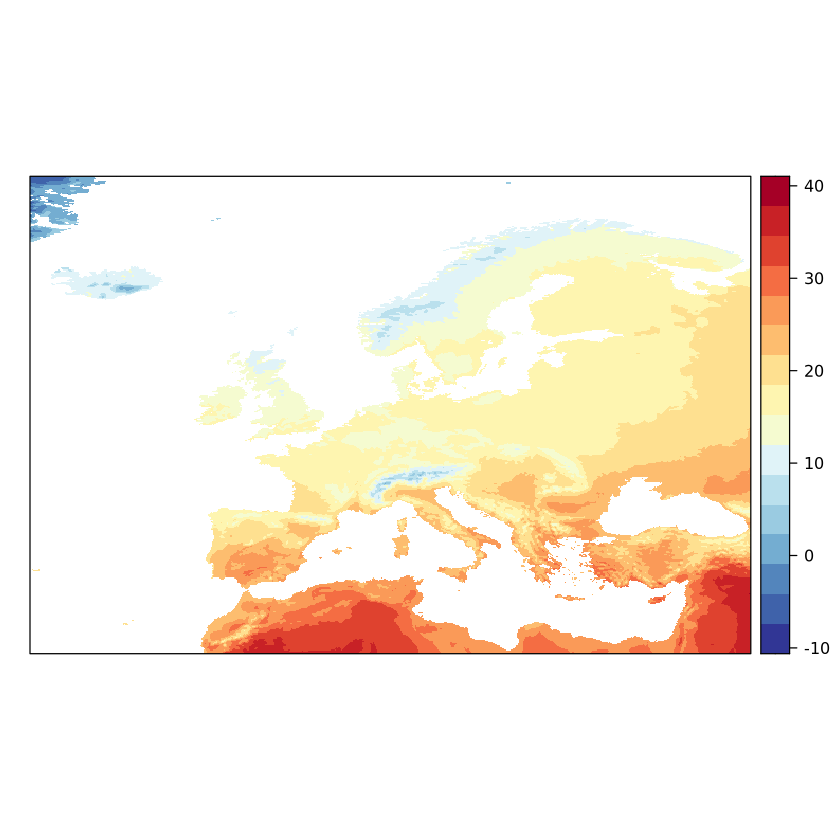

In [9]:
spatialPlot(climatology(data_tas), rev.colors = TRUE)

In [10]:
data_hurs <- loadGridData(ncml_file_hurs, var = "hurs", years = 2000, season= 7)

[2026-01-18 19:19:57.768839] Defining geo-location parameters



[2026-01-18 19:19:57.799197] Defining time selection parameters

[2026-01-18 19:20:00.162954] Retrieving data subset ...

[2026-01-18 19:20:22.266664] Done



In [11]:
str(data_hurs)

List of 4
 $ Variable:List of 2
  ..$ varName: chr "hurs"
  ..$ level  : NULL
  ..- attr(*, "use_dictionary")= logi FALSE
  ..- attr(*, "description")= chr "near-surface relative humidity"
  ..- attr(*, "units")= chr "%"
  ..- attr(*, "longname")= chr "hurs"
  ..- attr(*, "daily_agg_cellfun")= chr "none"
  ..- attr(*, "monthly_agg_cellfun")= chr "none"
  ..- attr(*, "verification_time")= chr "none"
 $ Data    : num [1:744, 1:451, 1:681] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ...
  ..- attr(*, "dimensions")= chr [1:3] "time" "lat" "lon"
 $ xyCoords:List of 2
  ..$ x: num [1:681] -26 -25.9 -25.8 -25.7 -25.6 -25.5 -25.4 -25.3 -25.2 -25.1 ...
  ..$ y: num [1:451] 30 30.1 30.2 30.3 30.4 ...
  ..- attr(*, "projection")= chr "LatLonProjection"
  ..- attr(*, "resX")= num 0.1
  ..- attr(*, "resY")= num 0.1
 $ Dates   :List of 2
  ..$ start: chr [1:744] "2000-07-01 00:00:00 GMT" "2000-07-01 01:00:00 GMT" "2000-07-01 02:00:00 GMT" "2000-07-01 03:00:00 GMT" ...
  ..$ end  : chr [1:744] "2000-07-0

[2026-01-18 19:20:23.504554] - Computing climatology...

[2026-01-18 19:20:27.747031] - Done.



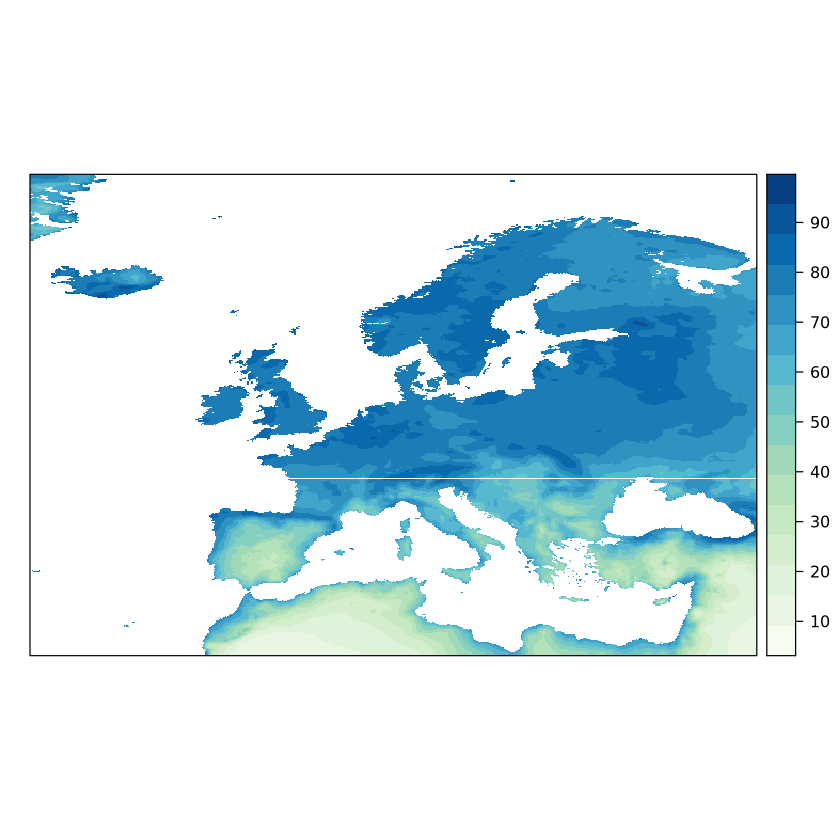

In [12]:
spatialPlot(climatology(data_hurs),color.theme = "GnBu")

[2026-01-18 19:20:29.868663] - Computing climatology...

[2026-01-18 19:20:30.146133] - Done.



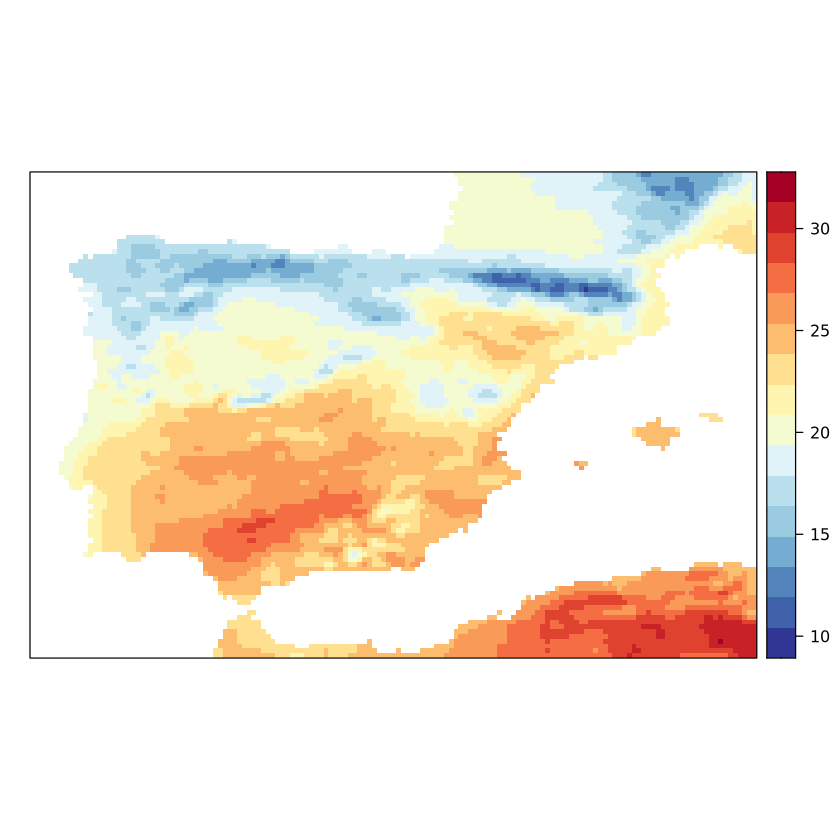

In [13]:
data_tas_iberia <- subsetGrid(data_tas, lonLim = c(-10,5), latLim = c(35,45))
data_hurs_iberia <- subsetGrid(data_hurs, lonLim = c(-10,5), latLim = c(35,45))
spatialPlot(climatology(data_tas_iberia), rev.colors = TRUE)


pad applied on the interval: day



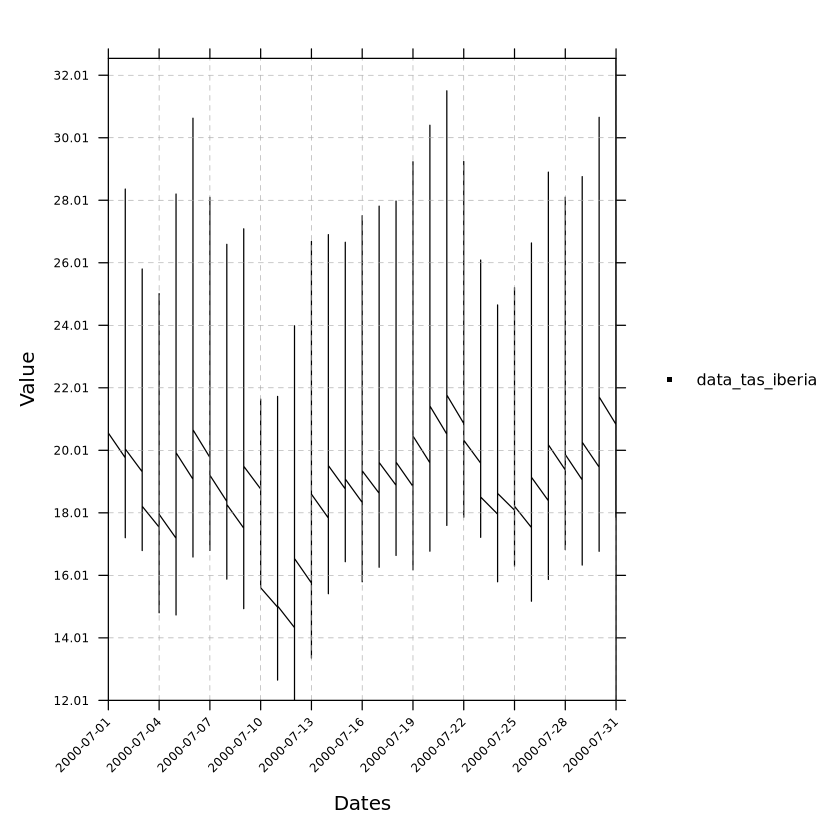

In [14]:
temporalPlot(data_tas_iberia)

### Example for heat stress calculation

The HeatStress package is used to calculate one exemplary heat stress index. Here simplified wet bulb temperature is calculated, which requires air temperature and relative humidity. Note that other indices require dew point temperature, which can be derived from relative humidity with `hurs2tdps` in the [`convertR` package](https://github.com/SantanderMetGroup/convertR/blob/master/R/tdps2hurs.R).

In [15]:
indexShow()

code,longname,indexfun,tas,dewp,hurs,wind,radiation,units
<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>
wbt,Wet Bulb Temperature,wbt.Stull,1,0,1,0,0,degC
wbgt_shade,Wet Bulb Globe Temperature (shade),wbgt.Bernard,1,1,0,0,0,degC
wbgt_sun,Wet Bulb Globe Temperature (sun),wbgt.Liljegren,1,1,0,1,1,degC
swbgt,simplified wet bulb globe temperature,swbgt,1,0,1,0,0,degC
apparentTemp,apparent temperature,apparentTemp,1,0,1,1,0,degC
effectiveTemp,effective temperature,effectiveTemp,1,0,1,1,0,degC
humidex,humidex,humidex,1,0,1,0,0,degC
discomInd,discomfort index,discomInd,1,0,1,0,0,degC
hi,heat index,hi,1,0,1,0,0,degF


In [16]:
wbgt_iberia <- data_tas_iberia
wbgt_iberia$Data <- swbgt(tas = data_tas_iberia$Data, hurs = data_hurs_iberia$Data)
wbgt_iberia$Variable$varName <- "swbgt"
attributes(wbgt_iberia$Variable)$description <- "Simplified Wet-Bulb Globe Temperature"
attributes(wbgt_iberia$Variable)$longname <- "swbgt"

In [17]:
wbgt_iberia_agg <- aggregateGrid(wbgt_iberia, aggr.spatial = list(FUN = "mean", na.rm = TRUE))

Calculating areal weights...

[2026-01-18 19:20:31.913437] - Aggregating spatially...

[2026-01-18 19:20:32.246557] - Done.



In [18]:
hours_all <- format(as.POSIXct(getRefDates(wbgt_iberia_agg)), "%H:%M:%S")
hours <- unique(hours_all)
ls <-lapply(1:length(hours), function(h){
	idx <- which(hours_all %in% hours[h])
	data_sub <- subsetDimension(wbgt_iberia_agg, dimension = "time", indices = idx)
	data_sub_agg <- climatology(data_sub)
	return(data_sub_agg)
})	
day_cycle <-  bindGrid(ls, dimension = "time")

[2026-01-18 19:20:32.267959] - Computing climatology...

[2026-01-18 19:20:32.26909] - Done.

[2026-01-18 19:20:32.274498] - Computing climatology...

[2026-01-18 19:20:32.275608] - Done.

[2026-01-18 19:20:32.278348] - Computing climatology...

[2026-01-18 19:20:32.279446] - Done.

[2026-01-18 19:20:32.282208] - Computing climatology...

[2026-01-18 19:20:32.283274] - Done.

[2026-01-18 19:20:32.28602] - Computing climatology...

[2026-01-18 19:20:32.287116] - Done.

[2026-01-18 19:20:32.28983] - Computing climatology...

[2026-01-18 19:20:32.29089] - Done.

[2026-01-18 19:20:32.293611] - Computing climatology...

[2026-01-18 19:20:32.294696] - Done.

[2026-01-18 19:20:32.29743] - Computing climatology...

[2026-01-18 19:20:32.298543] - Done.

[2026-01-18 19:20:32.301331] - Computing climatology...

[2026-01-18 19:20:32.302412] - Done.



[2026-01-18 19:20:32.393297] - Computing climatology...

[2026-01-18 19:20:32.394715] - Done.

[2026-01-18 19:20:32.397357] - Computing climatology...

[2026-01-18 19:20:32.39843] - Done.

[2026-01-18 19:20:32.40113] - Computing climatology...

[2026-01-18 19:20:32.402199] - Done.

[2026-01-18 19:20:32.404904] - Computing climatology...

[2026-01-18 19:20:32.405971] - Done.

[2026-01-18 19:20:32.408576] - Computing climatology...

[2026-01-18 19:20:32.409615] - Done.

[2026-01-18 19:20:32.412245] - Computing climatology...

[2026-01-18 19:20:32.413291] - Done.

[2026-01-18 19:20:32.415961] - Computing climatology...

[2026-01-18 19:20:32.417023] - Done.

[2026-01-18 19:20:32.419651] - Computing climatology...

[2026-01-18 19:20:32.420754] - Done.

[2026-01-18 19:20:32.423424] - Computing climatology...

[2026-01-18 19:20:32.424491] - Done.

[2026-01-18 19:20:32.427142] - Computing climatology...

[2026-01-18 19:20:32.4282] - Done.

[2026-01-18 19:20:32.430885] - Computing climatology..

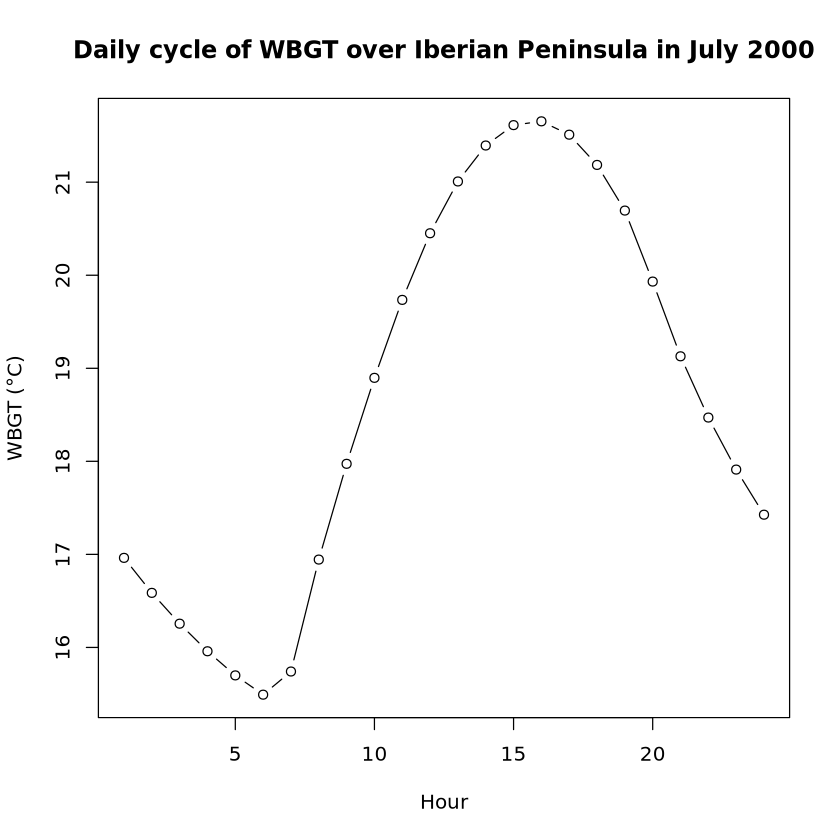

In [19]:
plot(day_cycle$Data, type="b", xlab="Hour", ylab="WBGT (°C)", main="Daily cycle of WBGT over Iberian Peninsula in July 2000")